In [1]:
#%% Import libraries
import numpy as np
import matplotlib.pyplot as plt
#from sympy import *
# from sympy.physics.mechanics import ReferenceFrame
from IPython.display import display, Latex, Math
#init_printing(use_latex='mathjax')

from sys import path
path.append(
    "c:\\Users\\diego\\Dropbox\\Academic\\MEng Space Systems\\3. DOCA\\ADCS functions")
import ADCS_Functions as adcs
import ADCS_Functions_sym as adcs_sym

________________________________

In [2]:
# The principal inertias of a rigid satellite are given by:

I1 = 210 # kgm^2
I2 = 200 # kgm^2
I3 = 118 # kgm^2
I = np.array([I1, I2, I3])

# Initial conditions are:
wIC = np.array([0.05, 0.02, -0.02]) # rad/s
thetaIC = np.array([0, 0, 0]) # rad

ics = np.concatenate([wIC, thetaIC])

Numerically solve the resulting torque-free motion for 100 s and plot the
resulting attitude in terms of the 3-2-1 Euler angles. Assume the initial Euler
angles to be zeros.

In [3]:
time = np.linspace(0, 100, 101)

________________

For this problem we need the complete attitude description, therefore we 
use the solution of Euler's equation for the $\omega_i$ and the solution of the 
attitude kinematics to give a complete description of the satellite.

The angular velocity vector components are integrated using Euler ́s 
equations with torque vector equals zero (T = 0).

In [4]:
from scipy.integrate import solve_ivp

In [5]:
def attitude_kinematics(time, x, I1, I2, I3):  # (time=None, ics=None):
    """
    Differential kinematics for a 3-2-1 Euler angle sequence.
    
    """
    ## Initialise
    from math import cos, sin

    ## Arguments
    I = np.array([I1, I2, I3])
    w = np.array([x[0], x[1], x[2]])
    theta = np.array([x[3], x[4], x[5]])
    
    ## Kinematics Equations
    dot_w1 = - ((I[2]-I[1]) / I[0]) * x[1] * x[2]
    dot_w2 = - ((I[0]-I[2]) / I[1]) * x[0] * x[2]
    dot_w3 = - ((I[1]-I[0]) / I[2]) * x[1] * x[0]
#
    dot_angles = np.dot((1/cos(theta[1]) * np.array([
        [cos(theta[1]), sin(theta[0])*sin(theta[1]),
         cos(theta[0])*sin(theta[1])],
        [0,           cos(theta[0])*cos(theta[1]), -
         sin(theta[0])*cos(theta[1])],
        [0,           sin(theta[0]),             cos(theta[0])]
    ])), w)
    
    dot_x = np.concatenate( (dot_w1, dot_w2, dot_w3, dot_angles), axis=None )#, dtype=object)

    return dot_x


In [6]:
sol = solve_ivp(attitude_kinematics, [0,100], ics, t_eval=time, method='RK45',args=(I1, I2, I3))

In [7]:
time = sol.t
omega = sol.y[0:3, :]
theta = sol.y[3:6,:]


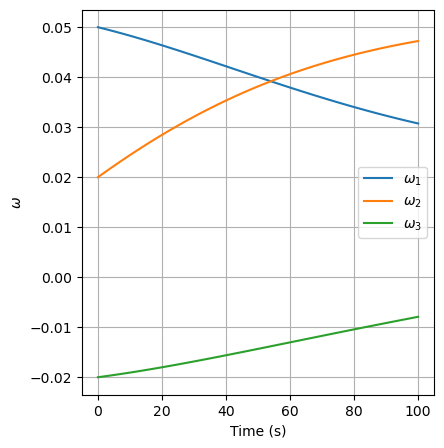

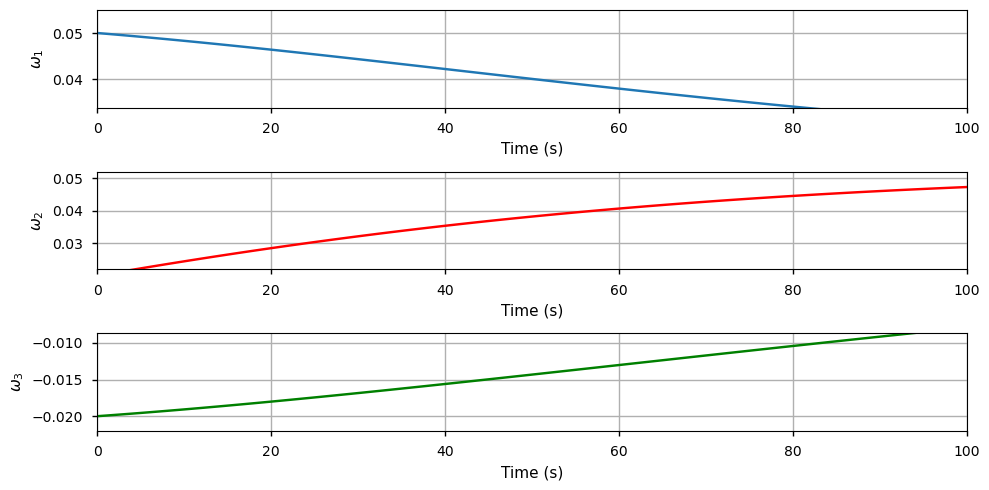

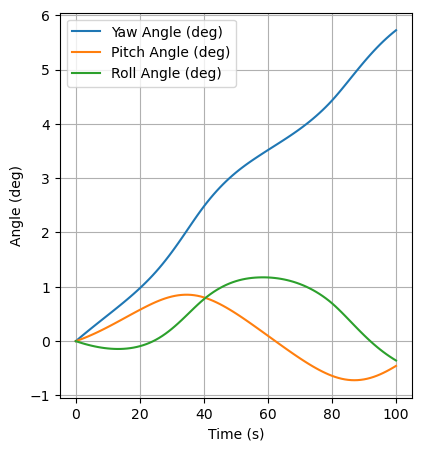

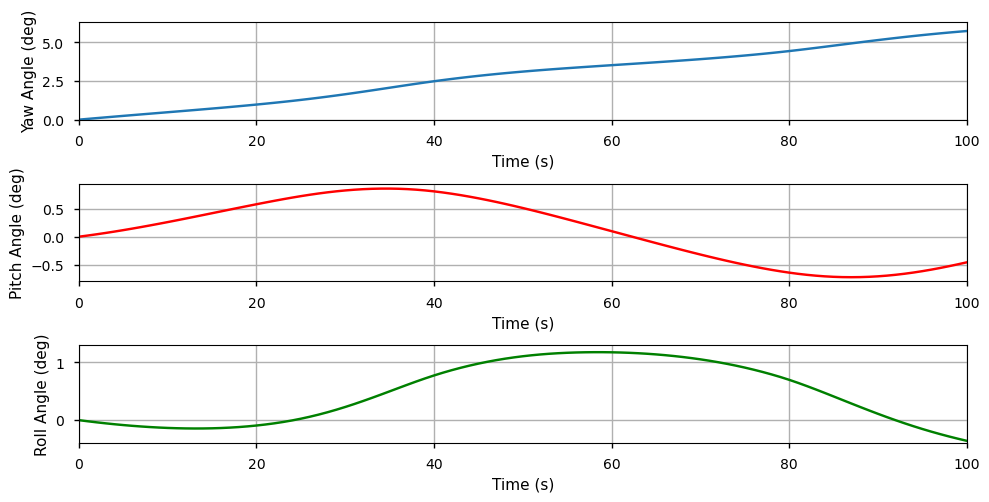

In [8]:
adcs.plot_euler(time, omega, ylabel='$\omega$', ylabel1='$\omega_1$',
                ylabel2='$\omega_2$', ylabel3='$\omega_3$')
adcs.plot_euler(time, theta)

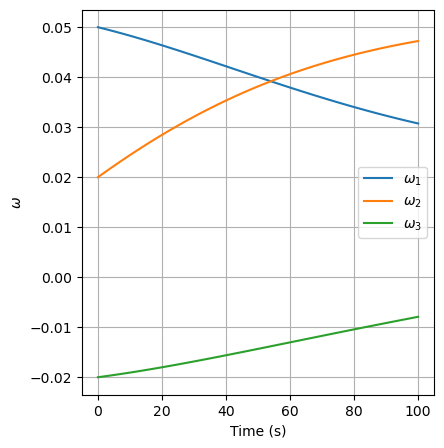

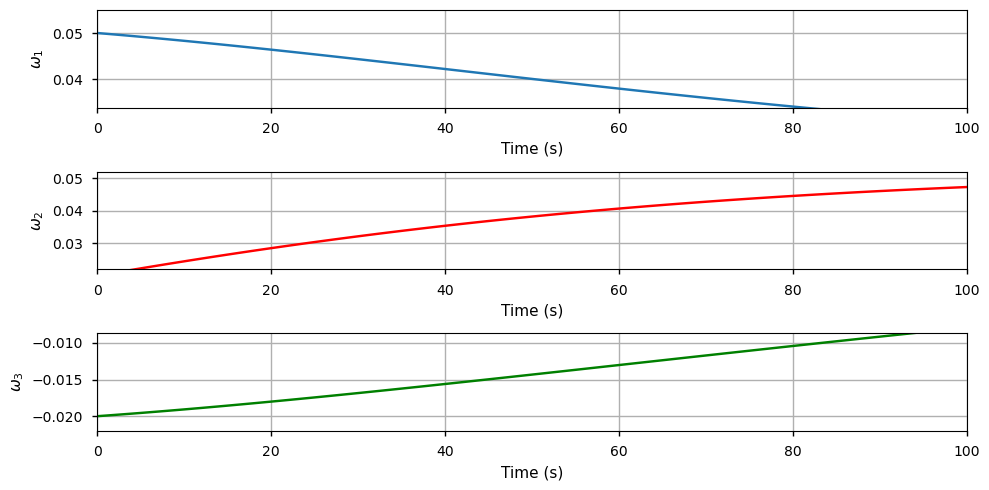

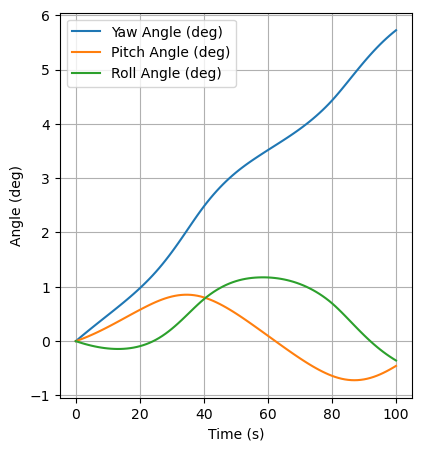

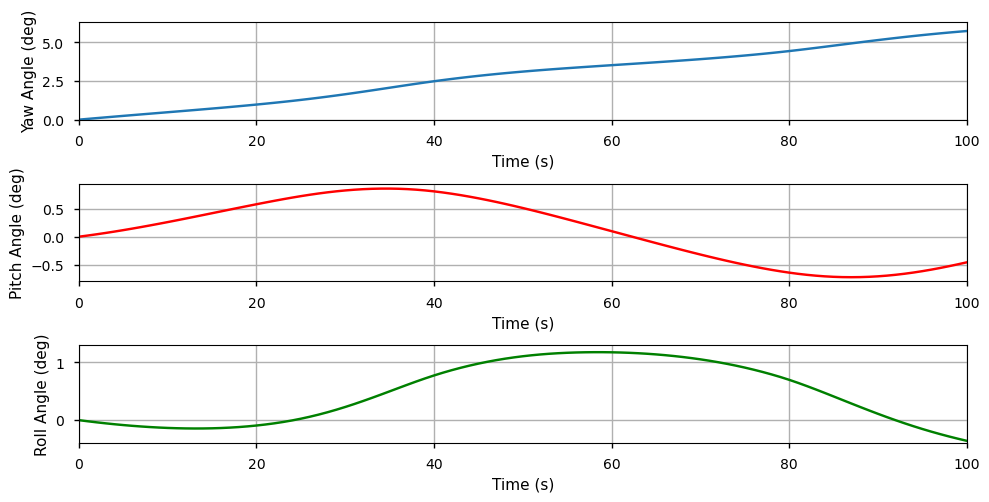

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100.]),
 array([[ 0.05      ,  0.04984236,  0.04968185,  0.04951856,  0.04935255,
          0.04918389,  0.04901266,  0.04883893,  0.04866278,  0.04848427,
          0.04830349,  0.04812051,  0.0479354 ,  0.04774823,  0.04755909,
          0.04736804,  0.04717516,  0.04698053,  0.04678421,  0.04658628,
          0.0463

In [10]:
adcs.solve_attitude_kimenatics_321(ics, I1, I2, I3, time_range=[0, 100], time_array=time, plot=True)

____________________

In [ ]:
def eulerEq(time, w, I1, I2, I3):
    """
    Differential kinematics for a 3-2-1 Euler angle sequence.
    
    """
    #w = np.array([0.05, 0.02, -0.02])  # rad/s
   
    I = np.array([ [I1, 0, 0], [0, I2, 0], [0, 0, I3] ])
    dot_w = np.linalg.inv(I) @ (np.cross(-w, (I @ w)))

    return dot_w


In [ ]:
sol = solve_ivp(eulerEq, [0, 100], wIC, t_eval=time, args=(I1,I2,I3))
#sol.y


In [ ]:
#adcs.plot_euler(sol.t, sol.y, ylabel='$\omega$', ylabel1='$\omega_1$',
#                ylabel2='$\omega_2$', ylabel3='$\omega_3$')


In [ ]:
#time_sol, dot_angles = adcs.solve_KDE(thetaIC, time_range=[0, 100], time_array=time, solver='E321', w=sol.y)
